In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# Importing additional libraries

import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, GridSearchCV

from sklearn.dummy import DummyClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, fbeta_score


In [3]:
# Setting the path
file_path = '/Users/sk/Desktop/Noobs/LB/Play/Project2401R/data.csv'

In [4]:
# Reading the dataset
data = pd.read_csv(file_path)

In [5]:
# Looking at the columns
data.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [6]:
# Looking at the info (datatype and nullity), and shape (dimentionality)
print(data.info())
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

(61069, 21)

In [7]:
# Checking duplicates
len(data[data.duplicated()])

146

In [8]:
# Dropping duplicates
data.drop_duplicates(inplace=True)
print(data.shape)

(60923, 21)


In [9]:
# Finding unique values in each colums
data.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

In [10]:
# Finding unique values and their counts in each column
unique_values = {col: data[col].value_counts() for col in data.columns}

for col, value_counts in unique_values.items():
    print(f"Unique values and counts '{col}':\n{value_counts}\n")

Unique values and counts 'class':
class
p    33742
e    27181
Name: count, dtype: int64

Unique values and counts 'cap-diameter':
cap-diameter
3.18     99
3.14     97
3.85     94
4.04     93
3.25     93
         ..
51.39     1
47.85     1
50.18     1
45.67     1
20.42     1
Name: count, Length: 2571, dtype: int64

Unique values and counts 'cap-shape':
cap-shape
x    26932
f    13404
s     7164
b     5694
o     3316
p     2598
c     1815
Name: count, dtype: int64

Unique values and counts 'cap-surface':
cap-surface
t    8184
s    7580
y    6341
h    4974
g    4722
d    4432
e    2584
k    2303
i    2225
w    2150
l    1308
Name: count, dtype: int64

Unique values and counts 'cap-color':
cap-color
n    24205
y     8541
w     7649
g     4312
e     4035
o     3653
r     1779
u     1709
p     1703
k     1279
b     1230
l      828
Name: count, dtype: int64

Unique values and counts 'does-bruise-or-bleed':
does-bruise-or-bleed
f    50333
t    10590
Name: count, dtype: int64

Unique values and

In [11]:
# Dropping irrelevent columns
data = data.drop(['veil-type'], axis=1)

In [12]:
# Finding missing values in each columns
missing_count = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending = False)
print("Missing Count:\n", missing_count)

missing_percent = (data.isnull().sum()/data.isnull().count())[data.isnull().sum()>0].sort_values(ascending=False)*100
print("\nMissing Percentage:\n", missing_percent)

Missing Count:
 spore-print-color    54597
veil-color           53510
stem-root            51536
stem-surface         38122
gill-spacing         25062
cap-surface          14120
gill-attachment       9855
ring-type             2471
dtype: int64

Missing Percentage:
 spore-print-color    89.616401
veil-color           87.832182
stem-root            84.592026
stem-surface         62.574069
gill-spacing         41.137173
cap-surface          23.176797
gill-attachment      16.176157
ring-type             4.055939
dtype: float64


<Axes: >

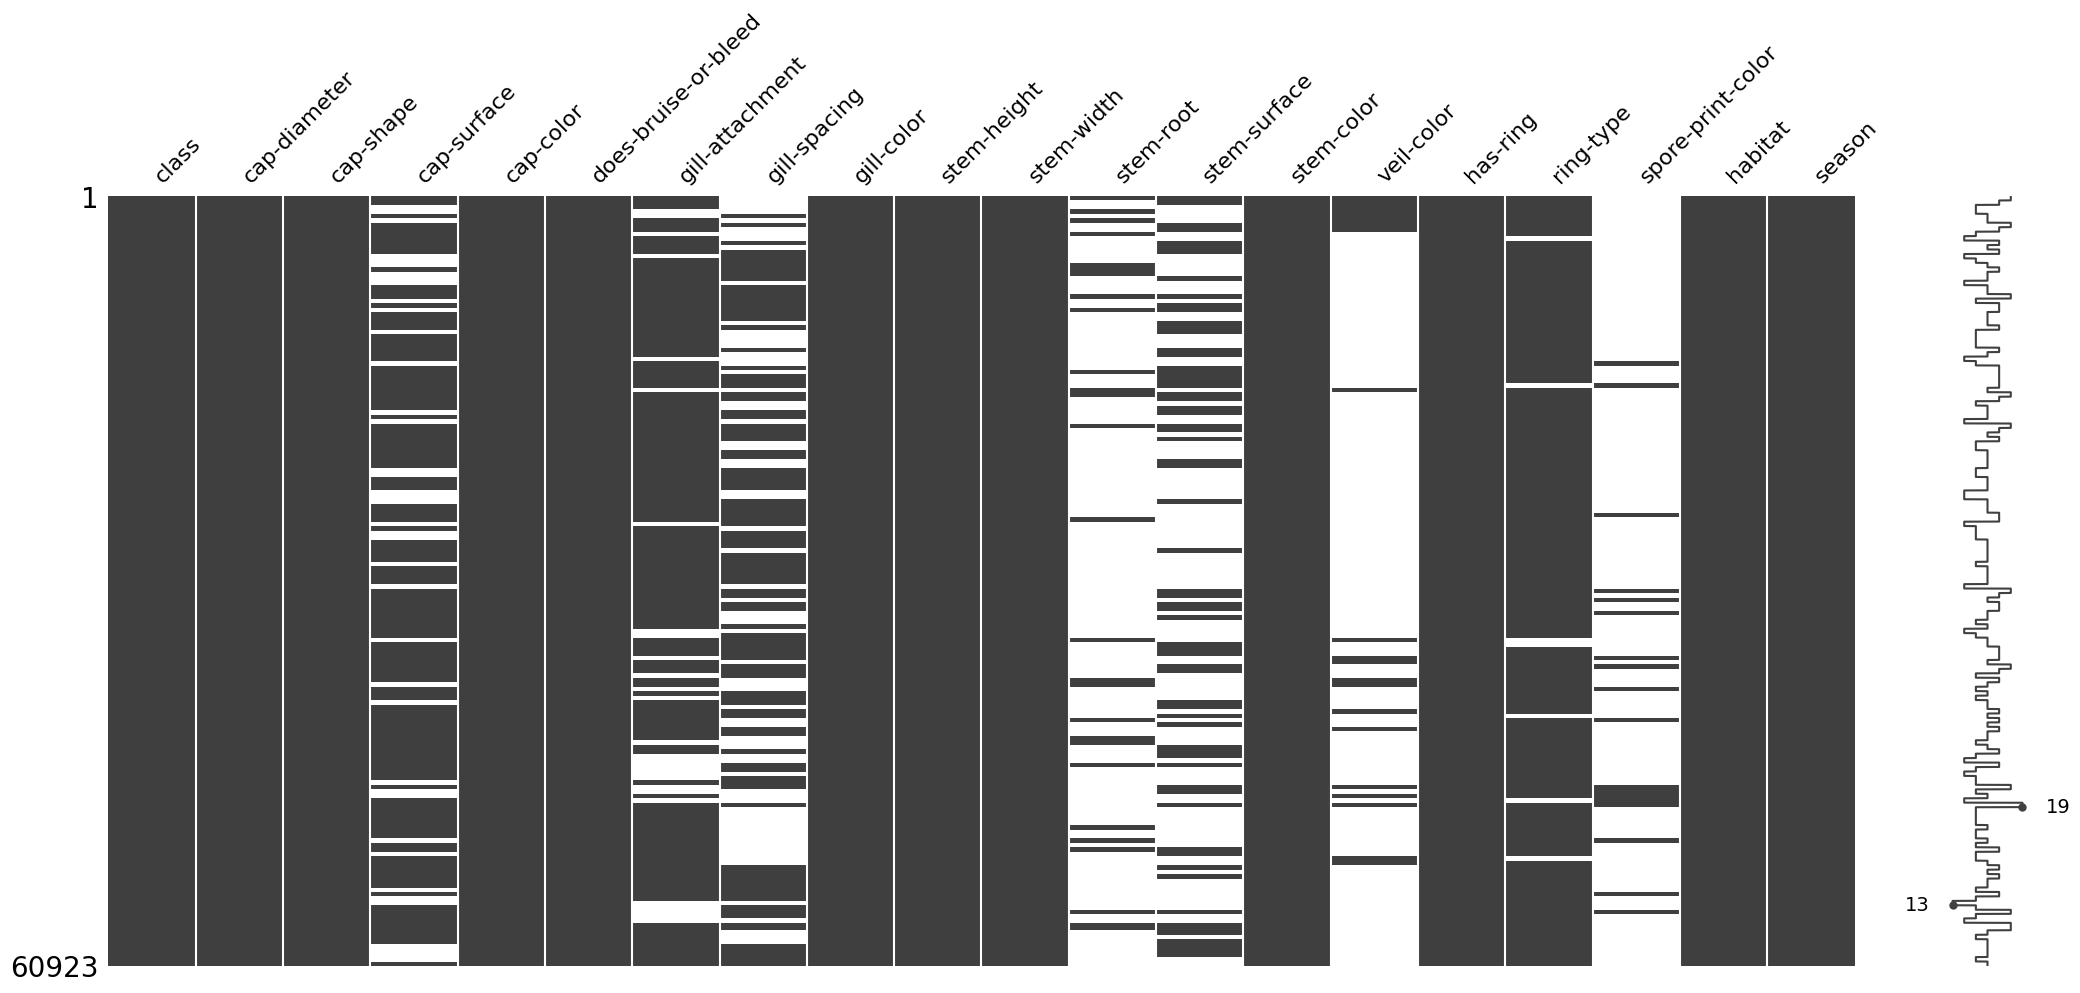

In [13]:
# Visualizing missing data
msno.matrix(data)

In [14]:
# Dropping more irrelevent columns
data = data.drop(['spore-print-color', 'veil-color', 'stem-root','stem-surface'], axis=1)

In [15]:
# Looking at the head (first few rows)
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w


In [16]:
# Having a glance at data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,60923.0,6.741957,5.268435,0.38,3.49,5.88,8.55,62.34
stem-height,60923.0,6.597202,3.358757,0.00,4.65,5.96,7.75,33.92
stem-width,60923.0,12.178484,10.030361,0.00,5.25,10.22,16.58,103.91


In [17]:
# Looking at Dependent Variable - Class Imbalance
target_count = data['class'].value_counts()
target_count

class
p    33742
e    27181
Name: count, dtype: int64

In [18]:
# Defining numerical, categorical, binary and target columns
m_column = ['cap-diameter', 'stem-height', 'stem-width']
n_column = ['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-spacing',
            'gill-color', 'stem-color', 'ring-type', 'habitat', 'season']
b_column = ['does-bruise-or-bleed', 'has-ring']
y_column = ['class']

In [19]:
# Mapping for column
column_mapping = {
    'class': 'Edibility',
    'cap-diameter': 'Cap Diameter',
    'cap-shape': 'Cap Shape',
    'cap-surface': 'Cap Surface',
    'cap-color': 'Cap Color',
    'does-bruise-or-bleed': 'Bruise or Bleed',
    'gill-attachment': 'Gill Attachment',
    'gill-spacing': 'Gill Spacing',
    'gill-color': 'Gill Color',
    'stem-height': 'Stem Height',
    'stem-width': 'Stem Width',


    'stem-color': 'Stem Color',

    
    'has-ring': 'Has Ring',
    'ring-type': 'Ring Type',
    
    'habitat': 'Habitat',
    'season': 'Season'
}

In [20]:
# Mapping for categories
class_mapping = {'e': 'Edible', 'p': 'Poisonous'}
cap_shape_mapping = {'b': 'Bell', 'c': 'Conical', 'x': 'Convex', 'f': 'Flat', 's': 'Sunken', 'p': 'Spherical', 'o': 'Other'}
cap_surface_mapping = {'i': 'Fibrous', 'g': 'Grooves', 'y': 'Scaly', 's': 'Smooth', 'h': 'Shiny', 'l': 'Leathery', 'k': 'Silky', 't': 'Sticky', 'w': 'Wrinkled', 'e': 'Fleshy', 'd': 'dry', '?': 'Unknown'}
cap_color_mapping = {'n': 'Brown', 'b': 'Buff', 'g': 'Gray', 'r': 'Green', 'p': 'Pink', 'u': 'Purple', 'e': 'Red', 'w': 'White', 'y': 'Yellow', 'l': 'Blue', 'o': 'Orange', 'k': 'Black', '?': 'Unknown'}
bruise_bleed_mapping = {'t': 'Yes', 'f': 'No'}
gill_attachment_mapping = {'a': 'Adnate', 'x': 'Adnexed', 'd': 'Decurrent', 'e': 'Free', 's': 'Sinuate', 'p': 'Pores', 'f': 'None', '?': 'Unknown'}
gill_spacing_mapping = {'c': 'Close', 'd': 'Distant', 'f': 'None', '?': 'Unknown'}
gill_color_mapping = {'n': 'Brown', 'b': 'Buff', 'g': 'Gray', 'r': 'Green', 'p': 'Pink', 'u': 'Purple', 'e': 'Red', 'w': 'White', 'y': 'Yellow', 'l': 'Blue', 'o': 'Orange', 'k': 'Black', 'f': 'None', '?': 'Unknown'}
stem_root_mapping = {'b': 'Bulbous', 's': 'Swollen', 'c': 'Club', 'u': 'Cup', 'e': 'Equal', 'z': 'Rhizomorphs', 'r': 'Rooted', 'f': 'None', '?': 'Unknown'}
stem_surface_mapping = {'i': 'Fibrous', 'g': 'Grooves', 'y': 'Scaly', 's': 'Smooth', 'h': 'Shiny', 'l': 'Leathery', 'k': 'Silky', 't': 'Sticky', 'w': 'Wrinkled', 'e': 'Fleshy', 'd': 'dry', 'f': 'None', '?': 'Unknown'}

has_ring_mapping = {'t': 'Yes', 'f': 'No'}
ring_type_mapping = {'c': 'Cobwebby', 'e': 'Evanescent', 'r': 'Flaring', 'g': 'Grooved', 'l': 'Large', 'p': 'Pendant', 's': 'Sheathing', 'z': 'Zone', 'y': 'Scaly', 'm': 'Movable', 'f': 'None', '?': 'Unknown'}
habitat_mapping = {'g': 'Grasses', 'l': 'Leaves', 'm': 'Meadows', 'p': 'Paths', 'h': 'Heaths', 'u': 'Urban', 'w': 'Waste', 'd': 'Woods'}
season_mapping = {'s': 'Spring', 'u': 'Summer', 'a': 'Autumn', 'w': 'Winter'}

In [21]:
# Maintaining copy of the original dataframe
data_copy = data.copy()

In [22]:
data_copy['class'] = data_copy['class'].map(class_mapping)
data_copy['cap-shape'] = data_copy['cap-shape'].map(cap_shape_mapping)
data_copy['cap-surface'] = data_copy['cap-surface'].map(cap_surface_mapping)
data_copy['cap-color'] = data_copy['cap-color'].map(cap_color_mapping)
data_copy['does-bruise-or-bleed'] = data_copy['does-bruise-or-bleed'].map(bruise_bleed_mapping)
data_copy['gill-attachment'] = data_copy['gill-attachment'].map(gill_attachment_mapping)
data_copy['gill-spacing'] = data_copy['gill-spacing'].map(gill_spacing_mapping)
data_copy['gill-color'] = data_copy['gill-color'].map(gill_color_mapping)


data_copy['stem-color'] = data_copy['stem-color'].map(gill_color_mapping)


data_copy['has-ring'] = data_copy['has-ring'].map(has_ring_mapping)
data_copy['ring-type'] = data_copy['ring-type'].map(ring_type_mapping)

data_copy['habitat'] = data_copy['habitat'].map(habitat_mapping)
data_copy['season'] = data_copy['season'].map(season_mapping)

In [23]:
data_copy.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,Poisonous,15.26,Convex,Grooves,Orange,No,Free,NaN,White,16.95,17.09,White,Yes,Grooved,Woods,Winter
1,Poisonous,16.60,Convex,Grooves,Orange,No,Free,NaN,White,17.99,18.19,White,Yes,Grooved,Woods,Summer
2,Poisonous,14.07,Convex,Grooves,Orange,No,Free,NaN,White,17.80,17.74,White,Yes,Grooved,Woods,Winter
3,Poisonous,14.17,Flat,Shiny,Red,No,Free,NaN,White,15.77,15.98,White,Yes,Pendant,Woods,Winter
4,Poisonous,14.64,Convex,Shiny,Orange,No,Free,NaN,White,16.53,17.20,White,Yes,Pendant,Woods,Winter


In [24]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-color            60923 non-null  object 
 12  has-ring              60923 non-null  object 
 13  ring-type             58452 non-null  object 
 14  habitat               60923 non-null  object 
 15  season                60

In [25]:
nb_column = n_column + b_column

for col in nb_column:
    data_copy[col] = data_copy[col].astype('category')
    data_copy['class'] = data_copy['class'].astype('category')

In [26]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 60923 non-null  category
 1   cap-diameter          60923 non-null  float64 
 2   cap-shape             60923 non-null  category
 3   cap-surface           46803 non-null  category
 4   cap-color             60923 non-null  category
 5   does-bruise-or-bleed  60923 non-null  category
 6   gill-attachment       51068 non-null  category
 7   gill-spacing          35861 non-null  category
 8   gill-color            60923 non-null  category
 9   stem-height           60923 non-null  float64 
 10  stem-width            60923 non-null  float64 
 11  stem-color            60923 non-null  category
 12  has-ring              60923 non-null  category
 13  ring-type             58452 non-null  category
 14  habitat               60923 non-null  category
 15  season 

In [27]:
data_copy1 = data_copy.copy()

In [28]:
nan_column = ['gill-spacing', 'cap-surface', 'gill-attachment', 'ring-type']

imputer = SimpleImputer(strategy='most_frequent')

data_copy[nan_column] = imputer.fit_transform(data_copy[nan_column])


In [29]:
# Setting Visualization Params
tcol1, tcol2, tcol3 = '#dc7f99', '#e6be87', '#191724'
col1, col2, col3, col4, col5 = '#7fdcc2', '#87afe6', '#99dc7f', '#7f99dc', '#937fdc'
fig1, fig2 = (12, 4.5), (12, 9)
pie_explode = (0.015, 0)

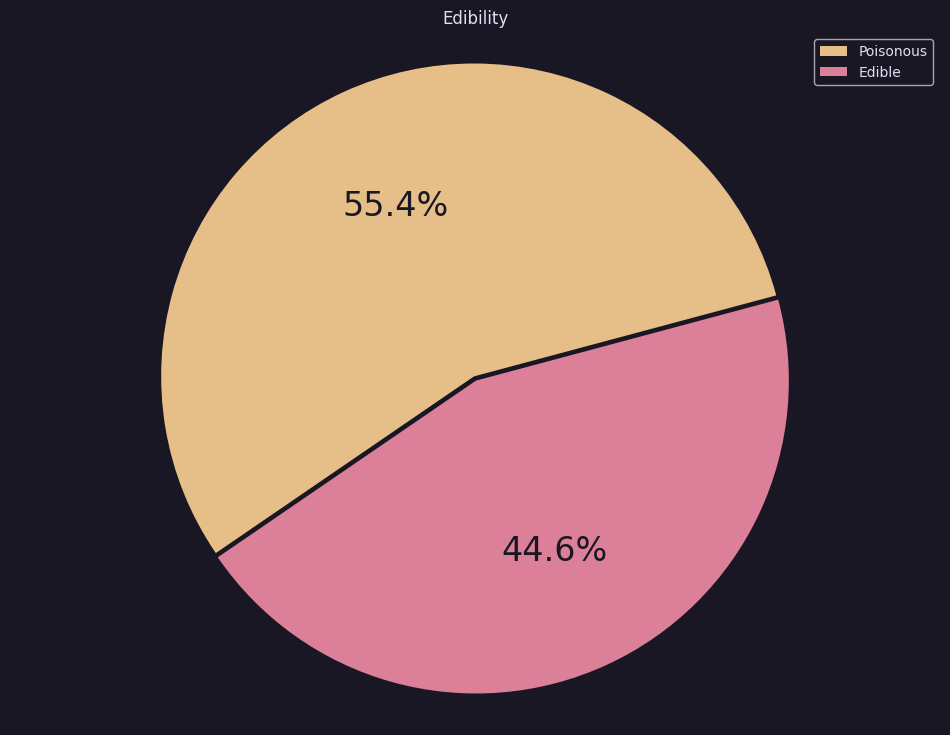

In [30]:
# Visulaizing the target variable
class_var_count = data_copy['class'].value_counts()
class_var_labels = ['Poisonous', 'Edible']
cols= [tcol2, tcol1]
plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
plt.figure(figsize=fig2)
text = {'color': tcol3, 'fontsize': 24}
plt.pie(class_var_count, labels=class_var_labels, autopct='%1.1f%%', startangle=15, explode=pie_explode, textprops=text, colors=cols)
plt.title(column_mapping['class'])
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

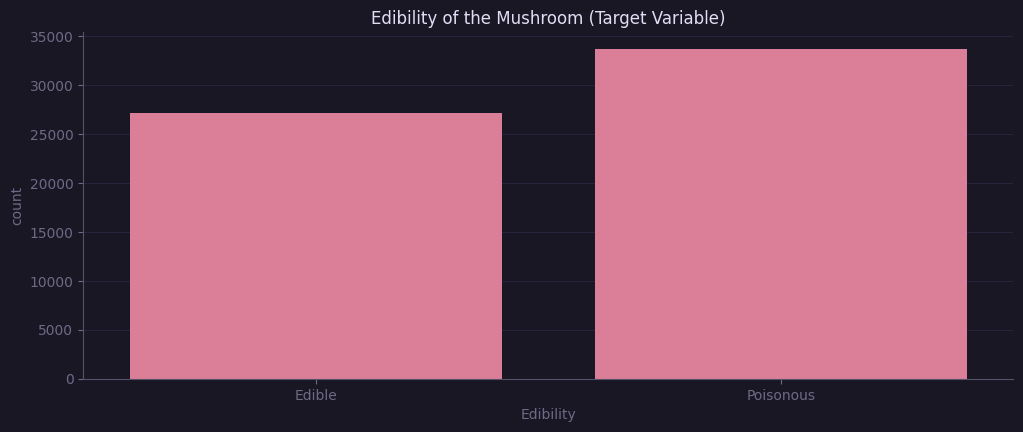

In [31]:
plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
plt.figure(figsize=fig1)
sns.countplot(x='class', data=data_copy)
plt.title((column_mapping['class'])+ ' ' + 'of the Mushroom (Target Variable)')
plt.xlabel(column_mapping['class'])
plt.show()

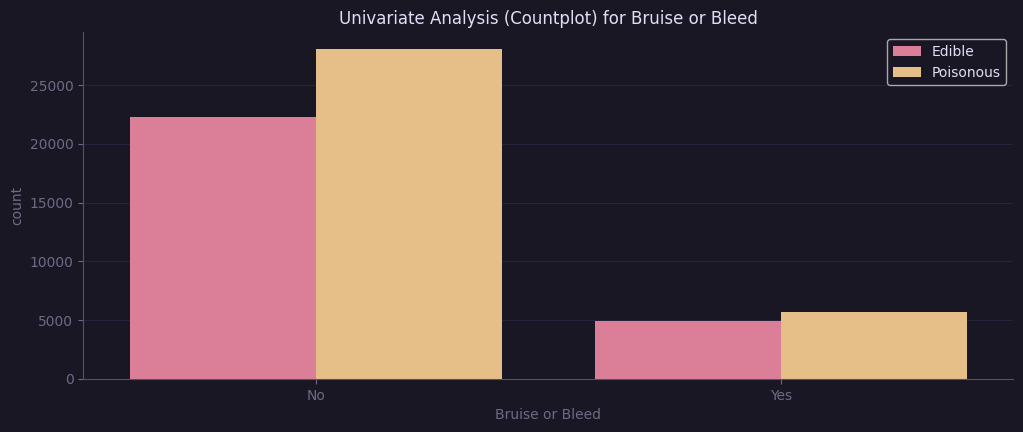

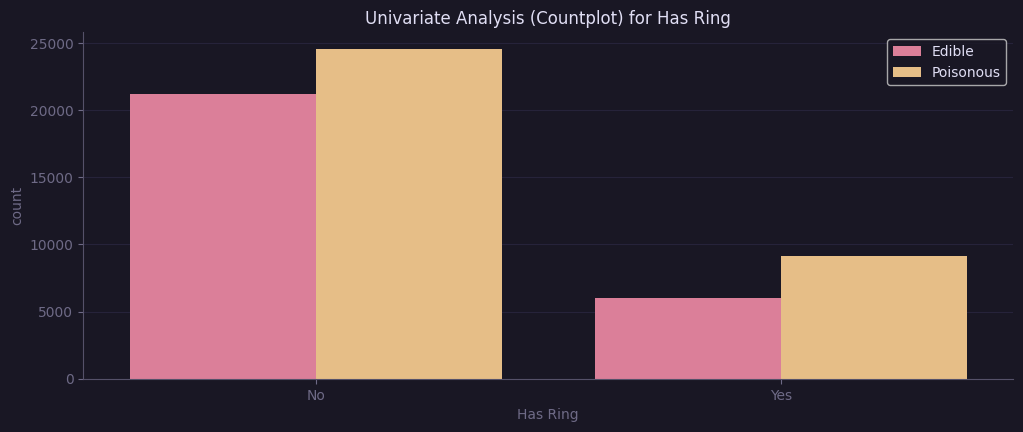

In [32]:
# countplot of categorical variable
for col in b_column:
    plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
    plt.figure(figsize=fig1)
    sns.countplot(x=col, hue='class', data=data_copy)
    plt.title(f'Univariate Analysis (Countplot) for {column_mapping[col]}')
    plt.xlabel(column_mapping[col])
    plt.legend(loc='upper right')
    plt.show()

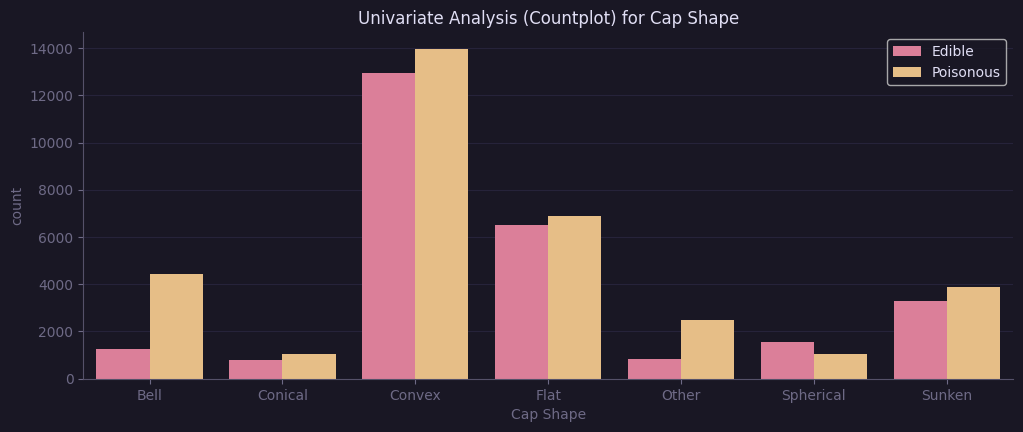

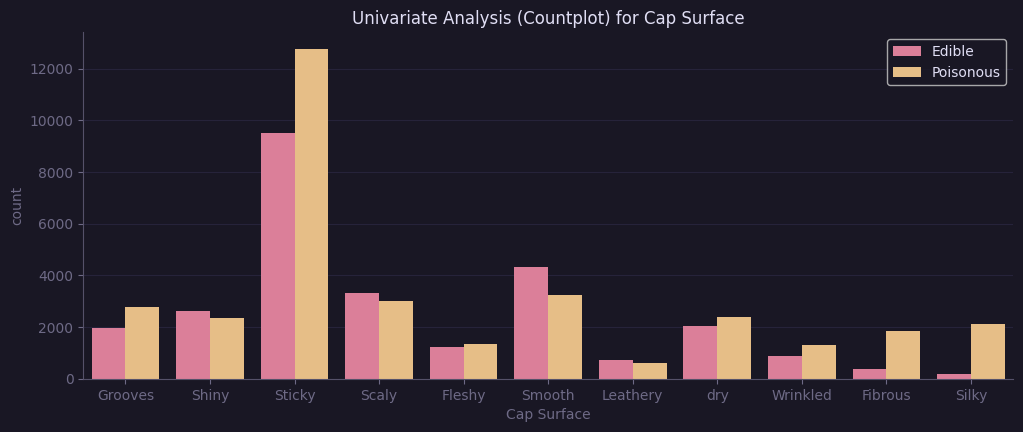

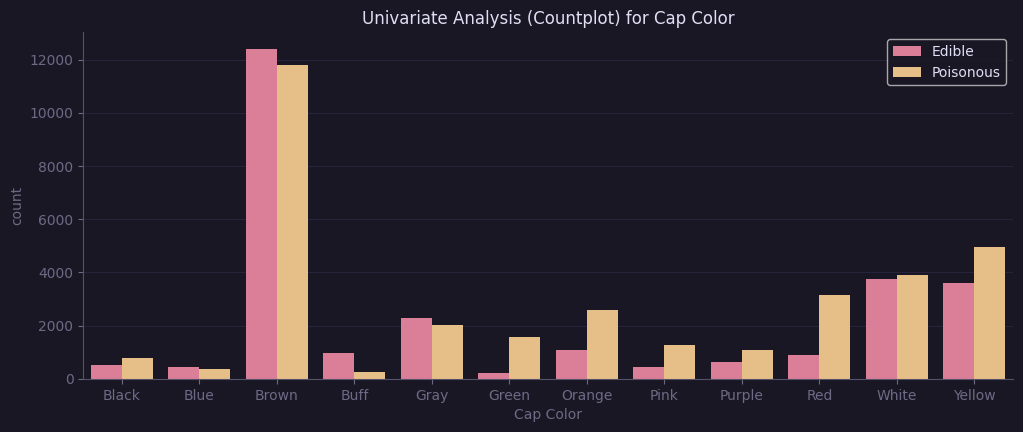

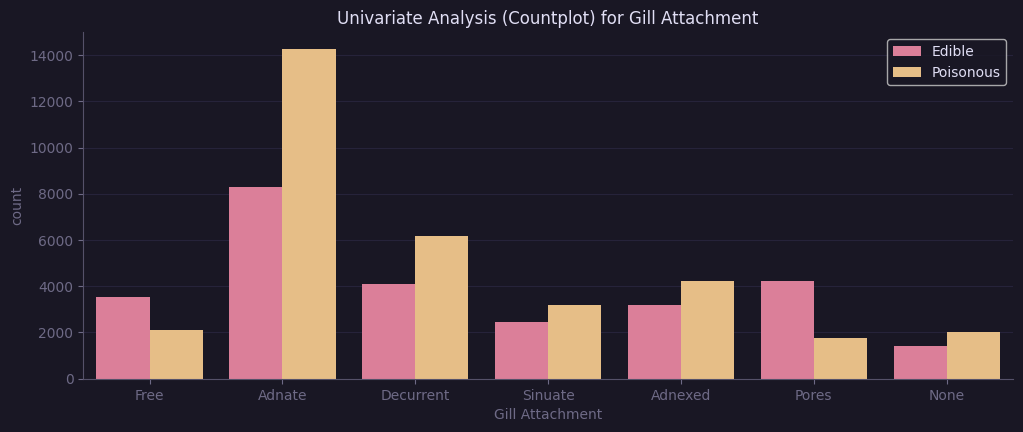

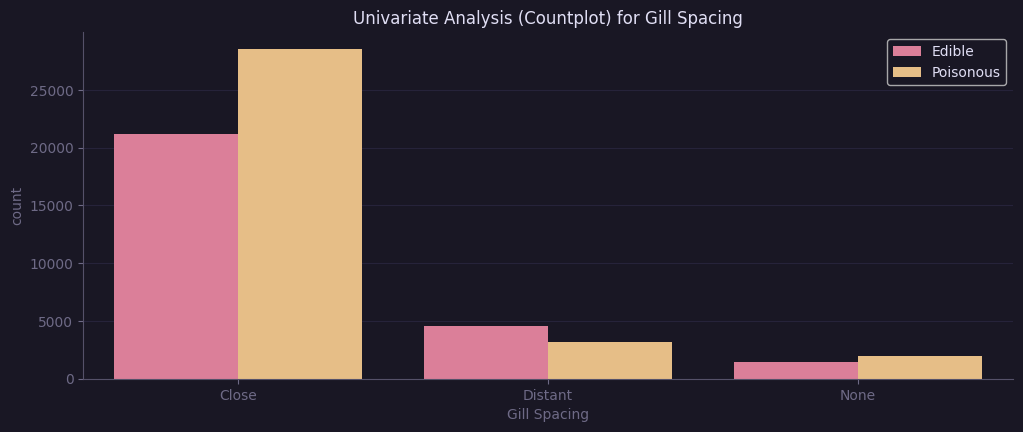

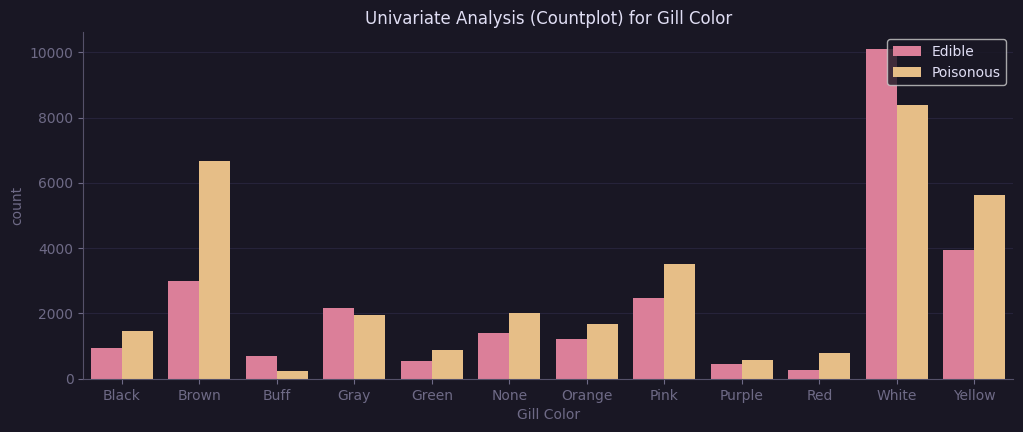

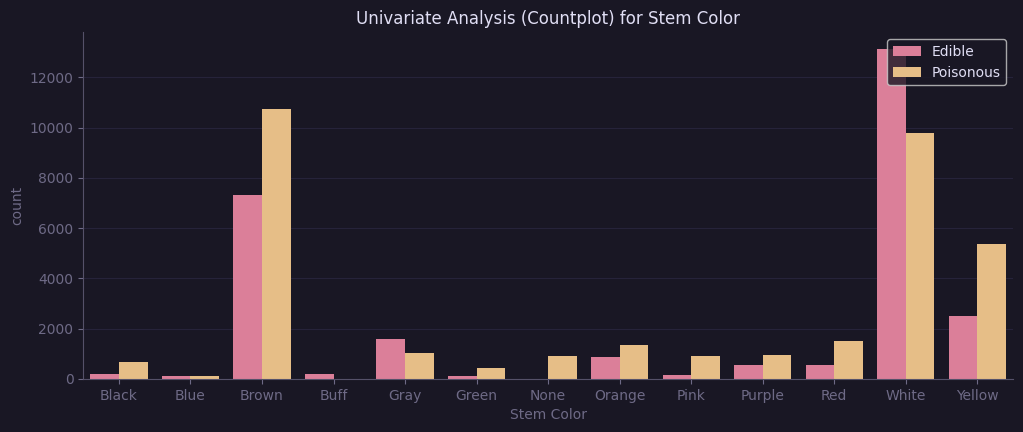

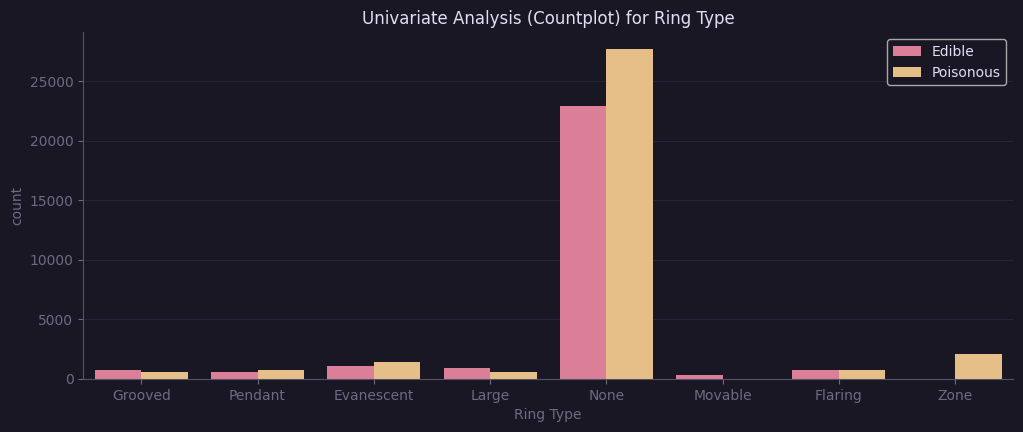

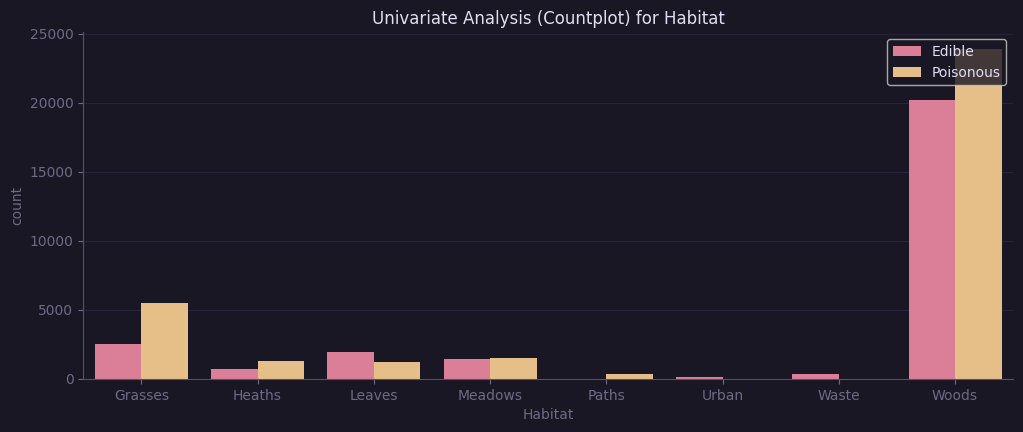

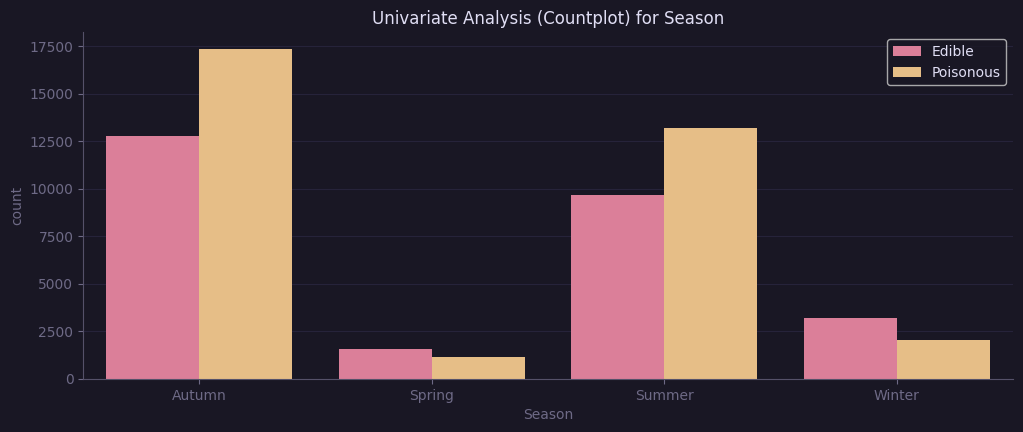

In [33]:
# countplot of categorical variable
for col in n_column:
    plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
    plt.figure(figsize=fig1)
    sns.countplot(x=col, hue='class', data=data_copy)
    plt.title(f'Univariate Analysis (Countplot) for {column_mapping[col]}')
    plt.xlabel(column_mapping[col])
    plt.legend(loc='upper right')
    plt.show()

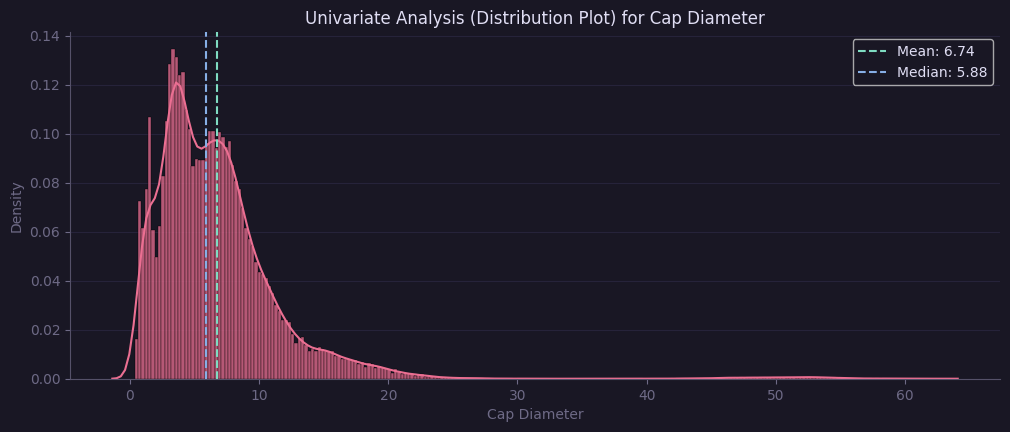

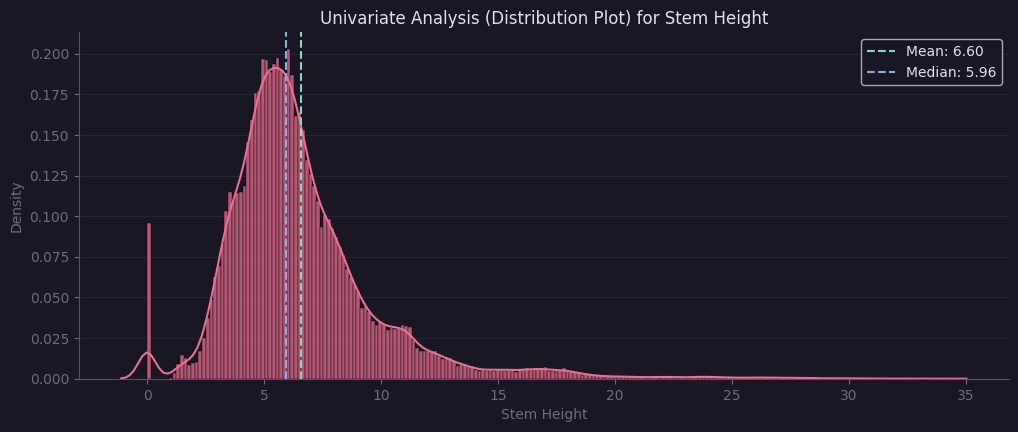

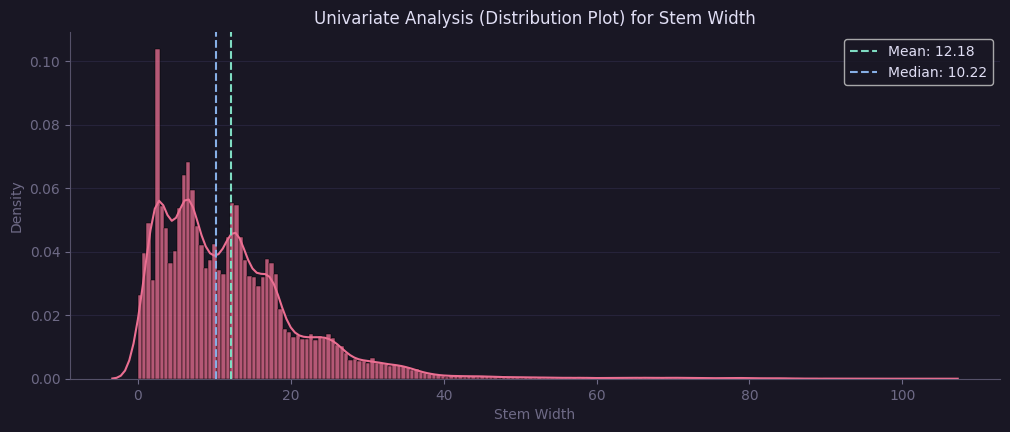

In [34]:
# Univariate analysis for continuous variables
for col in m_column:
    plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
    plt.figure(figsize=fig1)
    ax = sns.histplot(data_copy[col], kde=False, stat='density')
    sns.kdeplot(data=data_copy, x=col, ax=ax)
    plt.title(f'Univariate Analysis (Distribution Plot) for {column_mapping[col]}')
    plt.xlabel(column_mapping[col])
    
    mean_val = data_copy[col].mean()
    median_val = data_copy[col].median()
    plt.axvline(mean_val, color=col1, linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color=col2, linestyle='--', label=f'Median: {median_val:.2f}')
    plt.legend()
    plt.show()

<Figure size 1200x900 with 0 Axes>

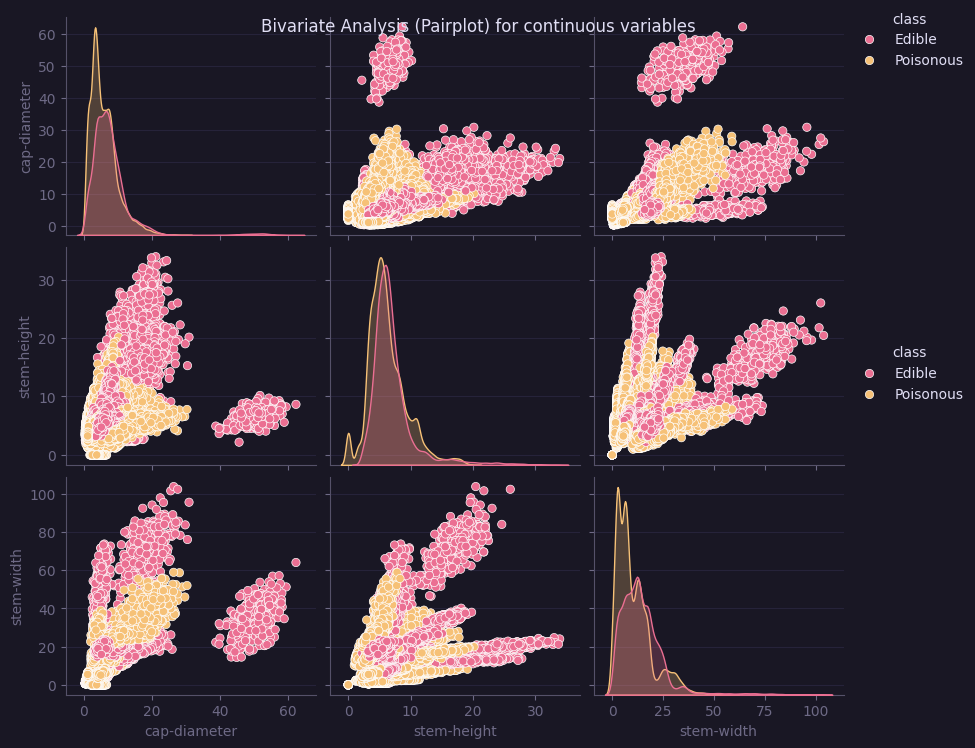

In [35]:
# Univariate analysis for continuous variables
plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
plt.figure(figsize=fig2)
g = sns.pairplot(data_copy, hue='class')
g.fig.suptitle(f'Bivariate Analysis (Pairplot) for continuous variables')
g.add_legend(loc='upper right')
plt.show()

<Axes: >

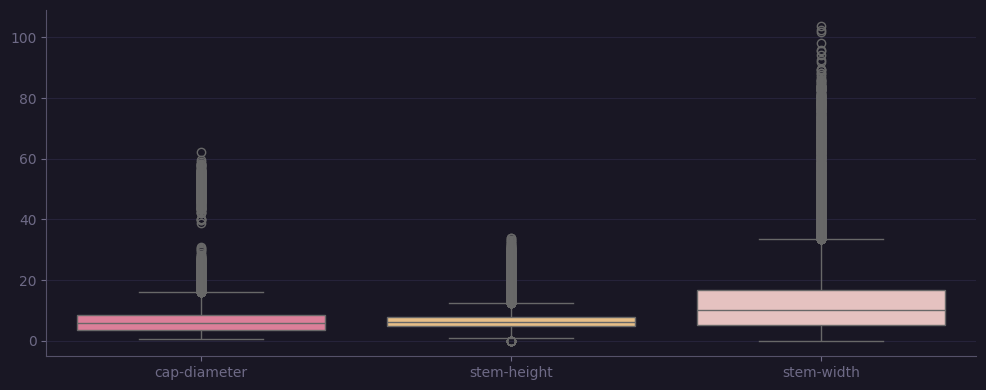

In [36]:
# Univariate analysis for continuous variables
plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
plt.figure(figsize=fig1)
sns.boxplot(data=data_copy[['cap-diameter', 'stem-height', 'stem-width']])

In [37]:
data_le = data_copy.copy()

In [38]:
le = LabelEncoder()
for col in nb_column:
    data_le[col] = le.fit_transform(data_le[col]) 
data_le['class'] = le.fit_transform(data_le['class'])

data_le.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,2,2,6,0,3,0,10,16.95,17.09,11,1,2,7,3
1,1,16.60,2,2,6,0,3,0,10,17.99,18.19,11,1,2,7,2
2,1,14.07,2,2,6,0,3,0,10,17.80,17.74,11,1,2,7,3
3,1,14.17,3,5,9,0,3,0,10,15.77,15.98,11,1,6,7,3
4,1,14.64,2,5,6,0,3,0,10,16.53,17.20,11,1,6,7,3


In [39]:
data_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  int64  
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  int64  
 3   cap-surface           60923 non-null  int64  
 4   cap-color             60923 non-null  int64  
 5   does-bruise-or-bleed  60923 non-null  int64  
 6   gill-attachment       60923 non-null  int64  
 7   gill-spacing          60923 non-null  int64  
 8   gill-color            60923 non-null  int64  
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-color            60923 non-null  int64  
 12  has-ring              60923 non-null  int64  
 13  ring-type             60923 non-null  int64  
 14  habitat               60923 non-null  int64  
 15  season                60

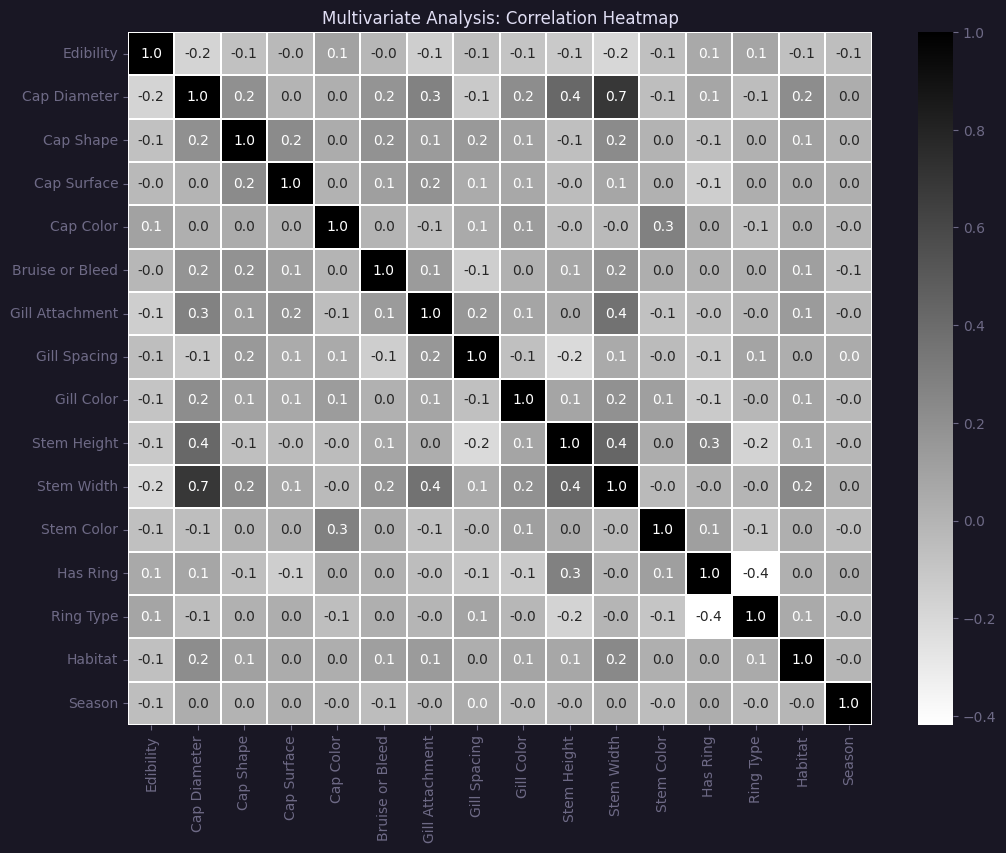

In [40]:
# Multivariate analysis using heatmap
correlation_matrix_le = data_le.corr()

plt.figure(figsize=fig2)
plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
sns.heatmap(correlation_matrix_le, annot=True, fmt=".1f", annot_kws={'size': 10}, linewidths=0.02, cmap='gray_r',
            xticklabels=[column_mapping[col] for col in data_le],
            yticklabels=[column_mapping[col] for col in data_le])
plt.title('Multivariate Analysis: Correlation Heatmap')
plt.show()

In [41]:
df0 = data_copy.copy()

In [42]:
X0 = df0.drop('class', axis=1)
y0 = df0['class']

In [43]:
# Splitting Dataset
X0_train0, X0_test0, y0_train0, y0_test0 = train_test_split(X0, y0, test_size=0.2, random_state=42)

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X0_train0, y0_train0)

# Calculating the baseline accuracy
dummy_predictions = dummy_classifier.predict(X0_test0)
baseline_accuracy = accuracy_score(y0_test0, dummy_predictions)
print("Baseline Accuracy:", round(baseline_accuracy, 4))

Baseline Accuracy: 0.5597


In [44]:
df = data_copy.copy()

In [45]:
df_enc = pd.get_dummies(df, columns= n_column,dtype=int, drop_first=True)

for col in b_column + ['class']:
    df_enc[col] = le.fit_transform(df_enc[col])
    
df_enc.shape

(60923, 81)

In [46]:
X = df_enc.drop('class', axis=1)
y = df_enc['class']

In [47]:
# Scaling the updated features (X) and the target variable (y)
scaler = StandardScaler()
X[m_column] = scaler.fit_transform(X[m_column])

In [48]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Define a custom scorer for F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'roc_auc': 'roc_auc', 'f2_score': f2_scorer}

In [50]:
# Logistic Regression
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_lr = cross_validate(lr_clf, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1, error_score='raise')

accuracy_lr = scores_lr['test_accuracy'].mean()
precision_lr = scores_lr['test_precision'].mean()
recall_lr = scores_lr['test_recall'].mean()
f1_lr = scores_lr['test_f1'].mean()
f2_lr = scores_lr['test_f2_score'].mean()
roc_auc_lr = scores_lr['test_roc_auc'].mean()

results = {}
results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr,
    'F2 Score': f2_lr,
    'ROC AUC': roc_auc_lr
}

In [51]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

scores_dt = cross_validate(dt_clf, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1, error_score='raise')

accuracy_dt = scores_dt['test_accuracy'].mean()
precision_dt = scores_dt['test_precision'].mean()
recall_dt = scores_dt['test_recall'].mean()
f1_dt = scores_dt['test_f1'].mean()
f2_dt = scores_dt['test_f2_score'].mean()
roc_auc_dt = scores_dt['test_roc_auc'].mean()

results['Decision Tree'] = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1 Score': f1_dt,
    'F2 Score': f2_dt,
    'ROC AUC': roc_auc_dt
}

In [52]:
# Naïve Bayes
nb_clf = GaussianNB()

scores_nb = cross_validate(nb_clf, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1, error_score='raise')

accuracy_nb = scores_nb['test_accuracy'].mean()
precision_nb = scores_nb['test_precision'].mean()
recall_nb = scores_nb['test_recall'].mean()
f1_nb = scores_nb['test_f1'].mean()
f2_nb = scores_nb['test_f2_score'].mean()
roc_auc_nb = scores_nb['test_roc_auc'].mean()

results['Naive Bayes'] = {
    'Accuracy': accuracy_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1 Score': f1_nb,
    'F2 Score': f2_nb,
    'ROC AUC': roc_auc_nb
}

In [53]:
# K-Nearest Neighbor
X_train_contig = np.ascontiguousarray(X_train)
X_test_contig = np.ascontiguousarray(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)

scores_knn = cross_validate(knn_clf, X_train_contig, y_train, cv=kf, scoring=scoring, n_jobs=-1, error_score='raise')

accuracy_knn = scores_knn['test_accuracy'].mean()
precision_knn = scores_knn['test_precision'].mean()
recall_knn = scores_knn['test_recall'].mean()
f1_knn = scores_knn['test_f1'].mean()
f2_knn = scores_knn['test_f2_score'].mean()
roc_auc_knn = scores_knn['test_roc_auc'].mean()

results['KNN'] = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn,
    'F2 Score': f2_knn,
    'ROC AUC': roc_auc_knn
}

In [54]:
# Support Vector Machine
svm_clf = SVC(probability=True, random_state=42)

scores_svm = cross_validate(svm_clf, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1, error_score='raise')

accuracy_svm = scores_svm['test_accuracy'].mean()
precision_svm = scores_svm['test_precision'].mean()
recall_svm = scores_svm['test_recall'].mean()
f1_svm = scores_svm['test_f1'].mean()
f2_svm = scores_svm['test_f2_score'].mean()
roc_auc_svm = scores_svm['test_roc_auc'].mean()

results['SVM'] = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm,
    'F2 Score': f2_svm,
    'ROC AUC': roc_auc_svm
}

In [55]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)

scores_rf = cross_validate(rf_clf, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1, error_score='raise')

accuracy_rf = scores_rf['test_accuracy'].mean()
precision_rf = scores_rf['test_precision'].mean()
recall_rf = scores_rf['test_recall'].mean()
f1_rf = scores_rf['test_f1'].mean()
f2_rf = scores_rf['test_f2_score'].mean()
roc_auc_rf = scores_rf['test_roc_auc'].mean()

results['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf,
    'F2 Score': f2_rf,
    'ROC AUC': roc_auc_rf
}

In [56]:
# XGBoost classifier with default hyperparameters
xgb_clf = XGBClassifier(random_state=42)

scores_xgb = cross_validate(xgb_clf, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1, error_score='raise')

accuracy_xgb = scores_xgb['test_accuracy'].mean()
precision_xgb = scores_xgb['test_precision'].mean()
recall_xgb = scores_xgb['test_recall'].mean()
f1_xgb = scores_xgb['test_f1'].mean()
f2_xgb = scores_xgb['test_f2_score'].mean()
roc_auc_xgb = scores_xgb['test_roc_auc'].mean()

results['XGBoost'] = {
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb,
    'F2 Score': f2_xgb,
    'ROC AUC': roc_auc_xgb
}

In [57]:
# Creating results dataframe
results_df = pd.DataFrame(results).T
print("Comparative Model Performance:")
print(results_df)

Comparative Model Performance:
                     Accuracy  Precision    Recall  F1 Score  F2 Score  \
Logistic Regression  0.775042   0.800164  0.790098  0.795078  0.792078   
Decision Tree        0.996902   0.997477  0.996916  0.997196  0.997028   
Naive Bayes          0.681870   0.669568  0.837227  0.744056  0.797288   
KNN                  0.999815   0.999778  0.999889  0.999833  0.999867   
SVM                  0.998441   0.997186  1.000000  0.998591  0.999436   
Random Forest        0.999918   0.999888  0.999963  0.999926  0.999948   
XGBoost              0.999610   0.999628  0.999667  0.999648  0.999659   

                      ROC AUC  
Logistic Regression  0.857263  
Decision Tree        0.996896  
Naive Bayes          0.766773  
KNN                  0.999977  
SVM                  0.999988  
Random Forest        0.999999  
XGBoost              0.999998  


In [58]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

accuracy_rfx = accuracy_score(y_test, y_pred_rf)
precision_rfx = precision_score(y_test, y_pred_rf)
recall_rfx = recall_score(y_test, y_pred_rf)
f1_rfx = f1_score(y_test, y_pred_rf)
roc_auc_rfx = roc_auc_score(y_test, y_pred_rf)

print("\nTest Set Results:")
print("Accuracy:", accuracy_rfx)
print("Precision:", precision_rfx)
print("Recall:", recall_rfx)
print("F1 Score:", f1_rfx)
print("ROC AUC:", roc_auc_rfx)


Test Set Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


In [59]:
classification_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Selected Model:")
print(classification_report_rf)


Classification Report for Selected Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5365
           1       1.00      1.00      1.00      6820

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



In [60]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Selected Model:")
print(confusion_matrix_rf)

Confusion Matrix for Selected Model:
[[5365    0]
 [   0 6820]]


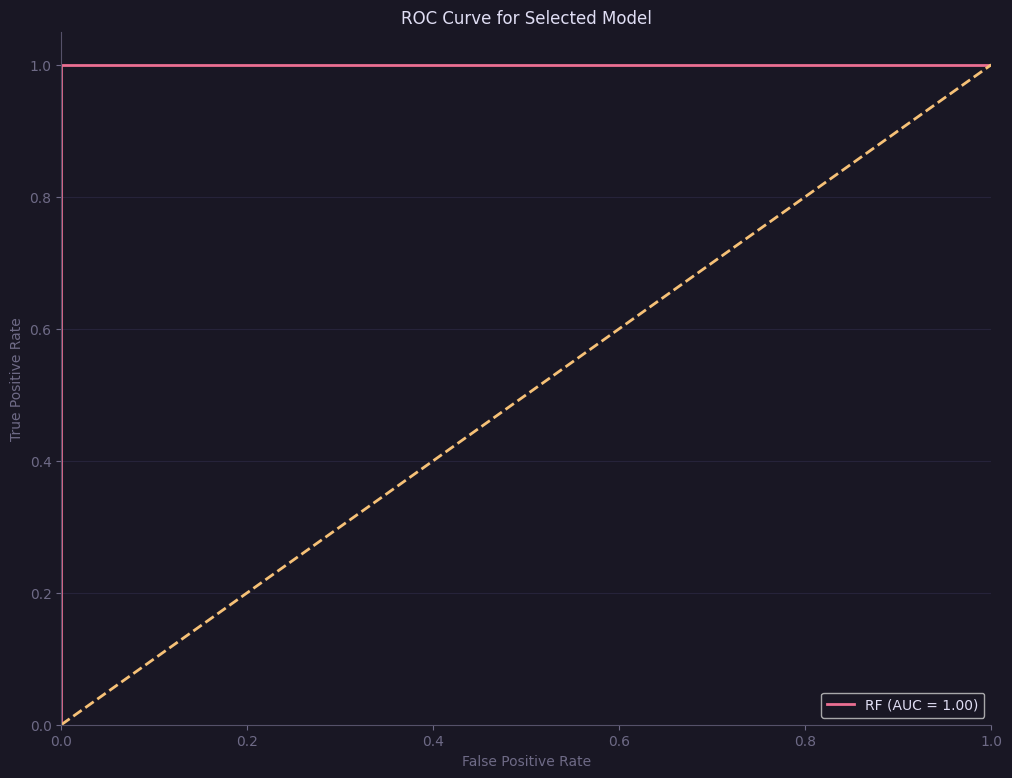

In [73]:
y_pred_rf_proba = rf_clf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC AUC curve
plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
plt.figure(figsize=fig2)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'RF (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Selected Model')
plt.legend(loc='lower right')
plt.show()

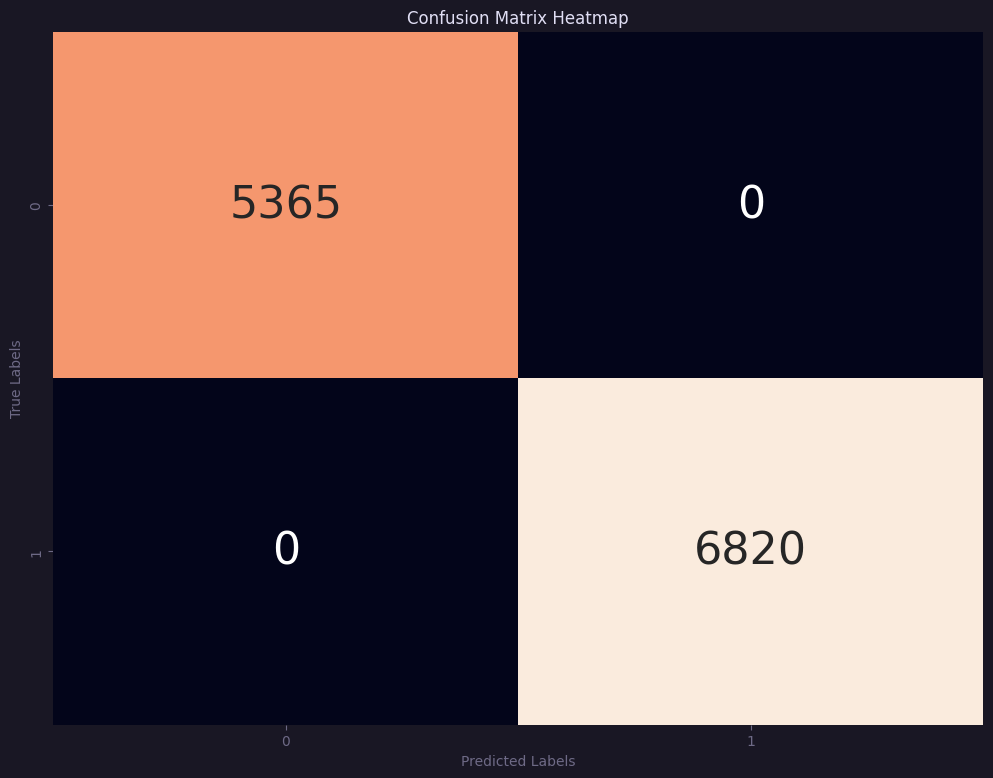

In [62]:
# Creating confusion matrix
plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
plt.figure(figsize=fig2)
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cbar=False, annot_kws={"size":32})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [63]:
pca = PCA()
pca.fit_transform(X)

array([[ 2.93953814e+00,  2.30117770e+00, -6.50882408e-01, ...,
        -2.50953596e-02, -9.39532751e-16, -1.80036010e-16],
       [ 3.30268266e+00,  2.44917047e+00, -6.70530493e-01, ...,
        -3.08725188e-02, -4.90981581e-16, -1.02471543e-16],
       [ 2.96914790e+00,  2.53008715e+00, -5.68332375e-01, ...,
        -2.19611900e-02, -1.74804269e-15, -3.09985945e-16],
       ...,
       [-1.49924317e+00, -6.31107665e-01,  4.36476432e-03, ...,
         6.90263220e-04, -9.08601909e-17,  6.82058009e-18],
       [-1.60470664e+00, -5.72232371e-01, -1.05043042e-01, ...,
        -1.29317746e-04, -6.89628984e-17, -2.20254614e-17],
       [-1.65591962e+00, -7.25140575e-01, -2.48457627e-02, ...,
         1.79154975e-04,  5.90712864e-17, -7.73471137e-18]])

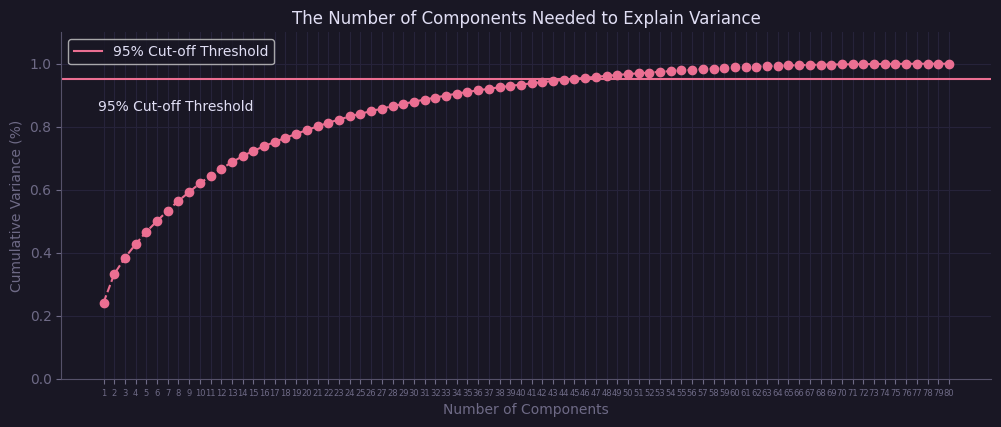

In [64]:
explained_variance_ratio = pca.explained_variance_ratio_
xi = np.arange(1, len(explained_variance_ratio) + 1)
cumulative_variance = np.cumsum(explained_variance_ratio)

fig, ax = plt.subplots(figsize=fig1)

ax.plot(xi, cumulative_variance, marker='o', linestyle='--')
ax.set_ylim(0.0, 1.1)
ax.set_xlabel('Number of Components')
ax.set_xticks(xi)
ax.set_ylabel('Cumulative Variance (%)')
ax.set_title('The Number of Components Needed to Explain Variance')
ax.axhline(y=0.95, linestyle='-', label='95% Cut-off Threshold')
ax.text(0.5, 0.85, '95% Cut-off Threshold')
ax.tick_params(axis='x', labelsize=6)
ax.grid(axis='x')
ax.legend()
plt.show()


In [65]:
pca = PCA(n_components=45)
X_pca = pca.fit_transform(X)
X_pca.shape

(60923, 45)

In [66]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

In [67]:
# RF with PCA classifier
rf_pca_clf = RandomForestClassifier(random_state=42)

rf_pca_clf.fit(X_pca_train, y_pca_train)

y_pca_pred = rf_pca_clf.predict(X_pca_test)

rf_pca_accuracy = accuracy_score(y_pca_test, y_pca_pred)
rf_pca_precision = precision_score(y_pca_test, y_pca_pred)
rf_pca_recall = recall_score(y_pca_test, y_pca_pred)
rf_pca_f1 = f1_score(y_pca_test, y_pca_pred)
rf_pca_roc_auc = roc_auc_score(y_pca_test, rf_pca_clf.predict_proba(X_pca_test)[:, 1])

print("Results for RF with PCA:")
print(f"Accuracy: {rf_pca_accuracy:.2f}")
print(f"Precision: {rf_pca_precision:.2f}")
print(f"Recall: {rf_pca_recall:.2f}")
print(f"F1 Score: {rf_pca_f1:.2f}")
print(f"ROC AUC: {rf_pca_roc_auc:.2f}")

Results for RF with PCA:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00


In [68]:
data_copy1['gill-spacing'] = data_copy1['gill-spacing'].cat.add_categories(['Unknown']).fillna('Unknown')
data_copy1['cap-surface'] = data_copy1['cap-surface'].cat.add_categories(['Unknown']).fillna('Unknown')
data_copy1['gill-attachment'] = data_copy1['gill-attachment'].cat.add_categories(['Unknown']).fillna('Unknown')
data_copy1['ring-type'] = data_copy1['ring-type'].cat.add_categories(['Unknown']).fillna('Unknown')
data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 60923 non-null  category
 1   cap-diameter          60923 non-null  float64 
 2   cap-shape             60923 non-null  category
 3   cap-surface           60923 non-null  category
 4   cap-color             60923 non-null  category
 5   does-bruise-or-bleed  60923 non-null  category
 6   gill-attachment       60923 non-null  category
 7   gill-spacing          60923 non-null  category
 8   gill-color            60923 non-null  category
 9   stem-height           60923 non-null  float64 
 10  stem-width            60923 non-null  float64 
 11  stem-color            60923 non-null  category
 12  has-ring              60923 non-null  category
 13  ring-type             60923 non-null  category
 14  habitat               60923 non-null  category
 15  season 

In [69]:
X1 = data_copy1.drop('class', axis=1)
y1 = data_copy1['class'].replace('Poisonous', 1).replace('Edible', 0)

In [70]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

train_dmatrix = xgb.DMatrix(X1_train, label=y1_train, enable_categorical=True)

params = {
  'booster': 'gbtree',
  'eta': 0.3,
  'max_depth': 6,
  'tree_method': 'auto',
  'objective': 'binary:logistic',
}
steps = 100
xgb_cat_clf = xgb.train(params, train_dmatrix, steps)

In [71]:
test_dmatrix = xgb.DMatrix(X1_test, enable_categorical=True)
preds = xgb_cat_clf.predict(test_dmatrix)
predictions = (preds > 0.5).astype(int)

xgb_cat_accuracy = accuracy_score(y1_test, predictions)
xgb_cat_precision = precision_score(y1_test, predictions)
xgb_cat_recall = recall_score(y1_test, predictions)
xgb_cat_cm = confusion_matrix(y1_test, predictions)

print("Accuracy: ", (xgb_cat_accuracy))
print("Precision: ", (xgb_cat_precision))
print("Recall: ", (xgb_cat_recall))
print("Confusion Matrix: \n", xgb_cat_cm)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Confusion Matrix: 
 [[5365    0]
 [   0 6820]]


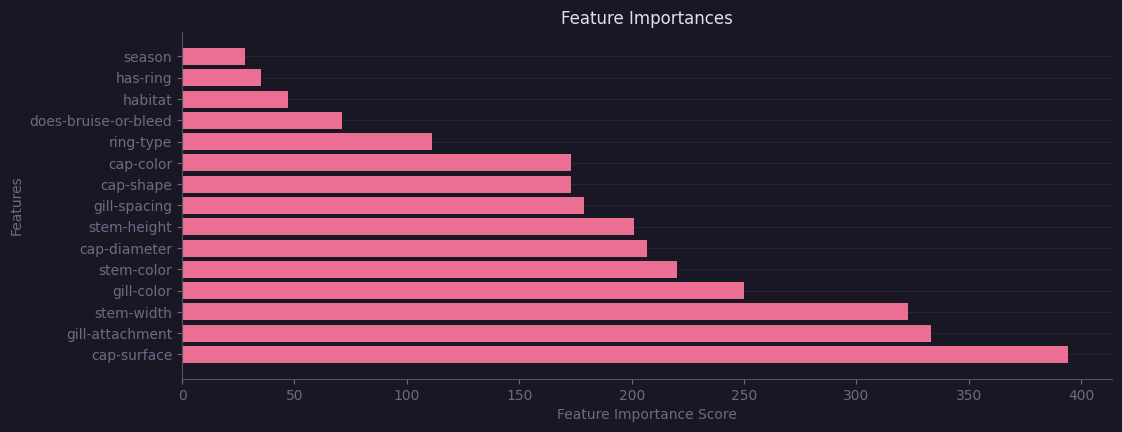

In [72]:
feature_importances = xgb_cat_clf.get_fscore()

# Sort feature importance scores in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract top features and their importance scores
top_features, importance_scores = zip(*sorted_feature_importances)

plt.style.use('/Users/sk/Desktop/Noobs/LB/Play/MPLStyles/rose-pine.mplstyle')
plt.figure(figsize=fig1)
plt.barh(top_features, importance_scores)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()